In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load('de_core_news_sm')

standard_scaling = False
percentage_scaling = True

parties = [
    'afd',
    'cdu_csu',
    'fdp',
    'spd',
    'grüne',
    'linke',
]

media = [
    'junge Welt',
    "NachDenkSeiten",
    'taz',
    'Süddeutsche Zeitung',
    'stern TV',
    "DER SPIEGEL",
    'Der Tagesspiegel',
    'ARD',
    #'Tagesschau',
    'ZDF',
    "ZDFheute Nachrichten",
    'Bayerischer Rundfunk',
    'ntv Nachrichten',
    'RTL',
    'FOCUS Online',
    'ZEIT ONLINE',
    'faz',
    'WELT',
    "BILD",
    'NZZ Neue Zürcher Zeitung',
    "Junge Freiheit",
    'COMPACTTV'
]

df = pd.read_pickle('../data/topic.pkl')
df['contains_cdu'] = df['preprocessed'].str.contains('cdu')
df['contains_csu'] = df['preprocessed'].str.contains('csu')
df['contains_fdp'] = df['preprocessed'].str.contains('fdp')
df['contains_grüne'] = df['preprocessed'].str.contains('grüne') 
df['contains_linke'] = df['preprocessed'].str.contains('linke')
df['contains_afd'] = df['preprocessed'].str.contains('afd') | df['preprocessed'].str.contains('afg')
df['contains_spd'] = df['preprocessed'].str.contains('spd')

In [46]:
mentions_by_media = df.groupby(['medium'])[['contains_afd', 'contains_cdu', 'contains_csu', 'contains_fdp', 'contains_spd', 'contains_grüne', 'contains_linke']].sum()
mentions_by_media = mentions_by_media.loc[media].transpose()

[Text(0.5, 50.09375, 'party'),
 Text(59.99999999999999, 0.5, 'medium'),
 Text(0.5, 1.0, 'party mentions by media source, standard scaler')]

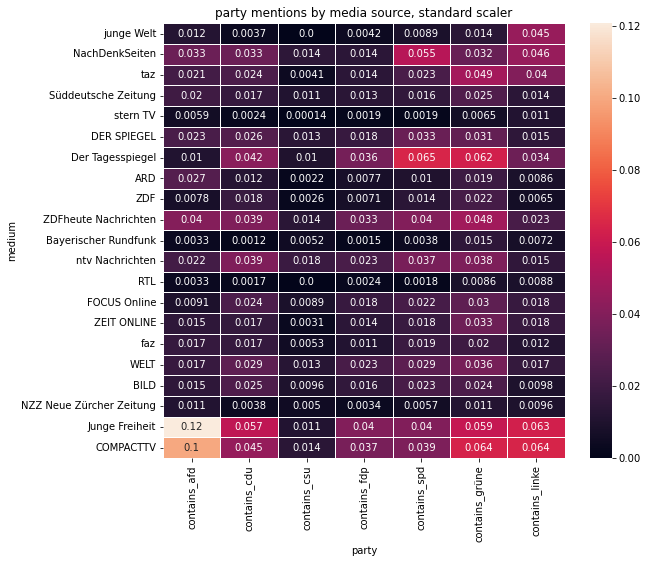

In [48]:
if percentage_scaling:
    mentions_by_media_scaled = mentions_by_media
    for medium in media:
        mentions_by_media_scaled[medium] = mentions_by_media[medium] / len(df[df['medium'] == medium])
    mentions_by_media_scaled = mentions_by_media_scaled.transpose()
    f, ax = plt.subplots(figsize=(9, 8))
    sns.heatmap(mentions_by_media_scaled, annot=True, fmt=".2", linewidths=.5, ax=ax)
    ax.set(xlabel='party', ylabel='medium', title='party mentions by media source, percentage scaling')

if standard_scaling:
    scaler = StandardScaler()
    mentions_by_media_scaled = pd.DataFrame(scaler.fit_transform(mentions_by_media), columns=mentions_by_media.columns, index=mentions_by_media.index).transpose()
    f, ax = plt.subplots(figsize=(9, 8))
    sns.heatmap(mentions_by_media_scaled, annot=True, fmt=".2", linewidths=.5, ax=ax)
    ax.set(xlabel='party', ylabel='medium', title='party mentions by media source, standard scaling')


In [49]:
n=10
for i in range(n):
    print(f"{i}. phrase:  ----   {df[df['contains_grüne']]['preprocessed'].iloc[i+10000]}")

0. phrase:  ----   warten politik führt verlässlich steuert staat wirtschaften wirtschaft verhältnisse systemisches denken strukturierung industrieller kreisläufer anwendungsorientierung feldern deutsche industrie stark mittelstand maschinenbau weltweit führenden treiber umwelttechnologie richtigen rahmenbedingungen schaffen europäisch denken stahlindustrie europa zukunft förderinstrumente klimaneutralen stahl funktionierenden preis perspektiven produkten zukünftig grüne stahl
1. phrase:  ----   hält wissen stehen fundament ökologie gerechtigkeit demokratie frieden werte leben wochenende gemeinsam verständigen schweren zeiten grundstein zukunft grundlage gesellschaft jahrzehnt vorhaben lasst raus lasst ändern leben lasst halt grüne
2. phrase:  ----   gesetz gegenteil demokratische gesellschaft land afg schützen artikel grundgesetzes britta haßelmann bündnis grünen rednerin herr präsident damen herren hand bistro müller huber woche wochen
3. phrase:  ----   anti parlamentarischen angrif